# Forecasting Electricity Load of Houston
(10 points Total)
### **Data Set**
A Cross-Domain Data Hub to Track the Impact of COVID-19 on U.S. Electricity Markets

https://github.com/tamu-engineering-research/COVID-EMDA

Particularly, we will use the electricity load data of Houston.

https://raw.githubusercontent.com/tamu-engineering-research/COVID-EMDA/master/data_release/ercot/ercot_houston_load.csv

### **Problem**
1. carry out component decomposition for the electricity load of Houston (2 points)

2. build an ARIMA model with an optimal order (p, d, q) (5 points)

3. make a prediction for the next 30 days, plot it out, and explain your results (3 points)

## Download and Process Dataset
**Please don't change this section!**

You can use the dataframe `df` for the rest of your analysis.

In [70]:
DATA_URL="https://raw.githubusercontent.com/tamu-engineering-research/COVID-EMDA/master/data_release/ercot/ercot_houston_load.csv"

In [71]:
# import pandas, numpy and seaborn. sns.set() will set multiple theme parameters in one step for seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [72]:
# read the data and change the index to datetime index to facilitate the analysis.
df=pd.read_csv(DATA_URL)
df["date"] = pd.to_datetime(df["date"])
df.set_index(pd.to_datetime(df.date, format="%Y-%m-%d"), inplace=True)
df.drop(["date"], axis=1, inplace=True)
df.head(5)

,00:00,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,09:00,...,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,8791.8,8569.7,8326.4,8137.5,8011.9,7978.1,8057.1,8125.8,8289.2,8646.5,...,9957.6,9987.9,9943.9,10181.0,10583.5,10451.0,10230.6,10014.8,9667.7,9287.7
2017-01-02,8836.8,8588.2,8480.8,8506.0,8644.7,8887.0,9176.5,9323.8,9559.9,9602.7,...,10937.1,11037.0,10931.5,10859.0,11112.1,10893.9,10594.2,10196.7,9568.1,8935.5
2017-01-03,8516.6,8238.2,8102.8,8094.3,8265.7,8816.3,9615.5,10009.8,10102.3,10235.3,...,11022.6,10988.9,10883.8,10882.0,11092.8,10889.1,10577.2,10100.1,9488.8,8916.9
2017-01-04,8462.0,8316.5,8259.6,8336.3,8636.6,9357.1,10504.8,10955.0,10944.0,11119.8,...,10713.0,10602.9,10638.3,11099.4,11605.9,11578.6,11416.8,11010.9,10392.6,9784.5
2017-01-05,9472.0,9198.3,9051.1,9031.1,9237.9,9836.5,10685.2,10931.8,10841.5,10912.8,...,10692.5,10696.2,10791.9,11130.9,11378.8,11311.2,11194.9,10882.2,10416.8,9959.7


In [73]:
df['load']= df.sum(axis=1)
df = df[["load"]]
df.head(5)

,load
date,
2017-01-01,220989.4
2017-01-02,235680.6
2017-01-03,237534.1
2017-01-04,247560.4
2017-01-05,251129.3


<Axes: xlabel='date'>

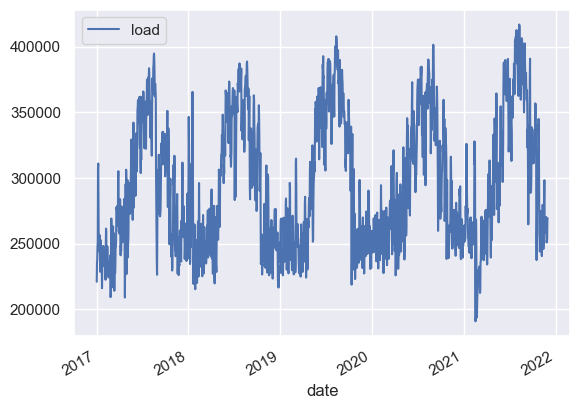

In [74]:
df.plot()

## Component Decomposition

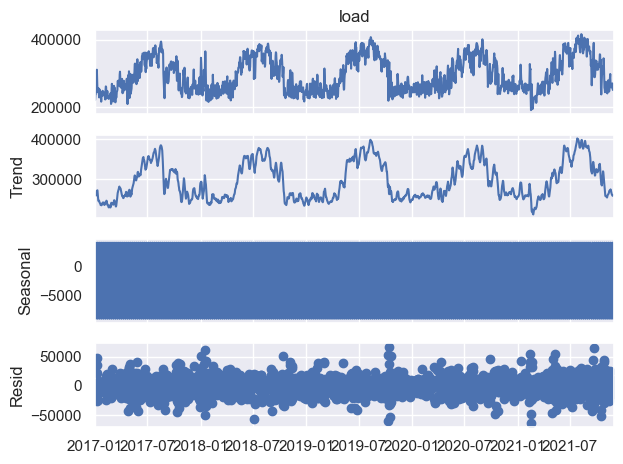

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# decompose the 'load' time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(df['load'], model='additive', period=7)

# plot the components
decomposition.plot()
plt.tight_layout()
plt.show()

## ARIMA Model and Forecasting

C:\Users\jimly\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jimly\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jimly\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jimly\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

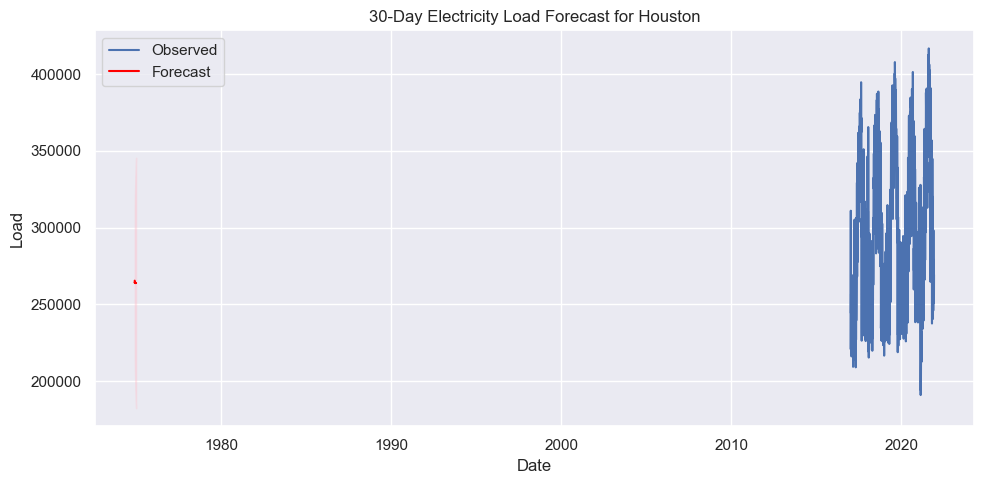


The 30-day forecast from the ARIMA(5,1,2) model seems to follow the overall pattern of Houston’s electricity load pretty well. It captures the general trend and some of the weekly ups and downs we saw in the data. The confidence intervals get wider the further out we predict, which makes sense since forecasts usually become less certain over time. While the model does a decent job, using a seasonal model like SARIMA might improve accuracy, especially since the data clearly shows a weekly pattern.



In [78]:
from statsmodels.tsa.arima.model import ARIMA

# fit an ARIMA model manually
model = ARIMA(df['load'], order=(5, 1, 2))
model_fit = model.fit()

# forecast the next 30 days
forecast = model_fit.get_forecast(steps=30)
forecast_df = forecast.summary_frame()

# plot the results
plt.figure(figsize=(10, 5))
plt.plot(df['load'], label='Observed')
plt.plot(forecast_df['mean'], label='Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='pink', alpha=0.3)
plt.title("30-Day Electricity Load Forecast for Houston")
plt.xlabel("Date")
plt.ylabel("Load")
plt.legend()
plt.tight_layout()
plt.show()

results = """
The 30-day forecast from the ARIMA(5,1,2) model seems to follow the overall pattern of Houston’s electricity load pretty well. It captures the general trend and some of the weekly ups and downs we saw in the data. The confidence intervals get wider the further out we predict, which makes sense since forecasts usually become less certain over time. While the model does a decent job, using a seasonal model like SARIMA might improve accuracy, especially since the data clearly shows a weekly pattern.
"""
print(results)